In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: 0.08583338376953553, 4: 0.3806492818144801, 5: 2, 6: 0.15180458677663144, 7: -0.35861700853987666, 8: -0.07926516004612494, 9: 0.24601227293639738, 10: -0.24421435394012303, 11: -0.12967966935797115, 12: -0.1335845020958636, 13: -0.41159297333215306, 14: 0.4719653547212458, 15: 0.378801536173051, 16: -0.15220468499026685, 17: 0.24290449787708124, 18: 0.2032357275102532, 19: -0.4854074850749709, 20: -0.4764036214027252}


D:\Github\smlm-dl\smlm_dl\dataset.py:364: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


104:	 [id = 104.000,], [A = 1947.362,], [bg = 31.074,], [x = -4.767,], [y = 8.599,], [z = -5.461,],
86:	 [id = 86.000,], [A = 1444.393,], [bg = 72.794,], [x = -6.896,], [y = 7.574,], [z = -7.754,],
7:	 [id = 7.000,], [A = 1407.775,], [bg = 88.101,], [x = 1.857,], [y = -7.684,], [z = -7.421,],
15:	 [id = 15.000,], [A = 1085.667,], [bg = 27.089,], [x = -7.121,], [y = -4.157,], [z = -5.643,],
118:	 [id = 118.000,], [A = 1602.805,], [bg = 5.423,], [x = 3.004,], [y = 3.484,], [z = -6.870,],
111:	 [id = 111.000,], [A = 1113.040,], [bg = 38.428,], [x = 5.572,], [y = -1.460,], [z = -2.148,],
11:	 [id = 11.000,], [A = 1125.862,], [bg = 68.854,], [x = -2.758,], [y = 4.264,], [z = 8.998,],
81:	 [id = 81.000,], [A = 1643.528,], [bg = 45.778,], [x = 6.027,], [y = -4.096,], [z = 1.802,],
12:	 [id = 12.000,], [A = 1107.531,], [bg = 43.980,], [x = 4.247,], [y = -7.870,], [z = -7.292,],
83:	 [id = 83.000,], [A = 1450.150,], [bg = 19.300,], [x = -5.166,], [y = -9.591,], [z = -0.632,],
9:	 [id = 9.000,],

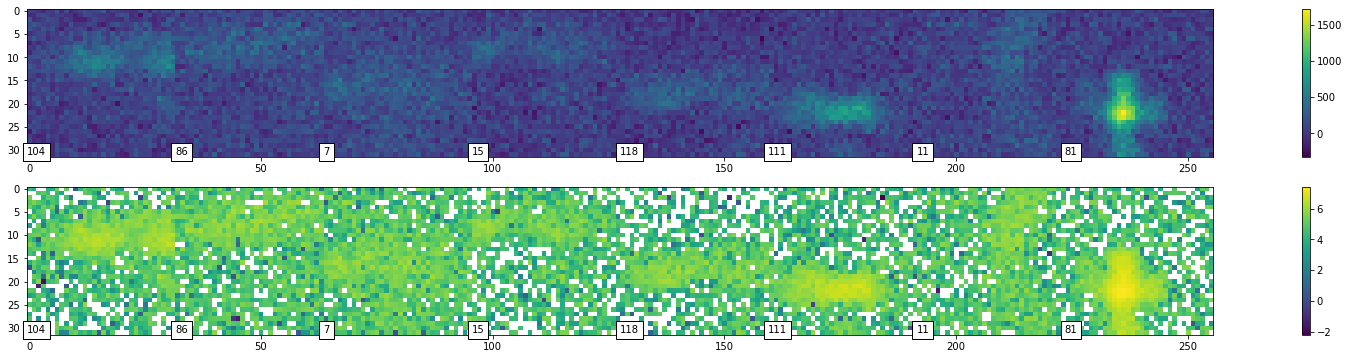

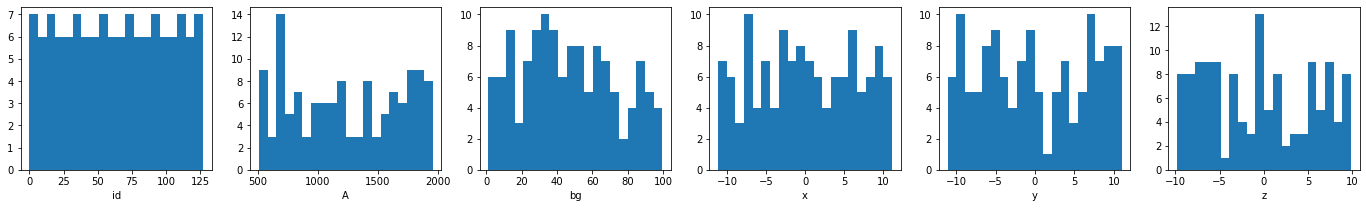

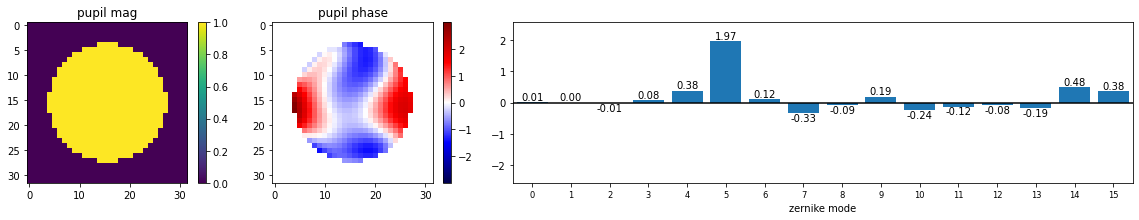

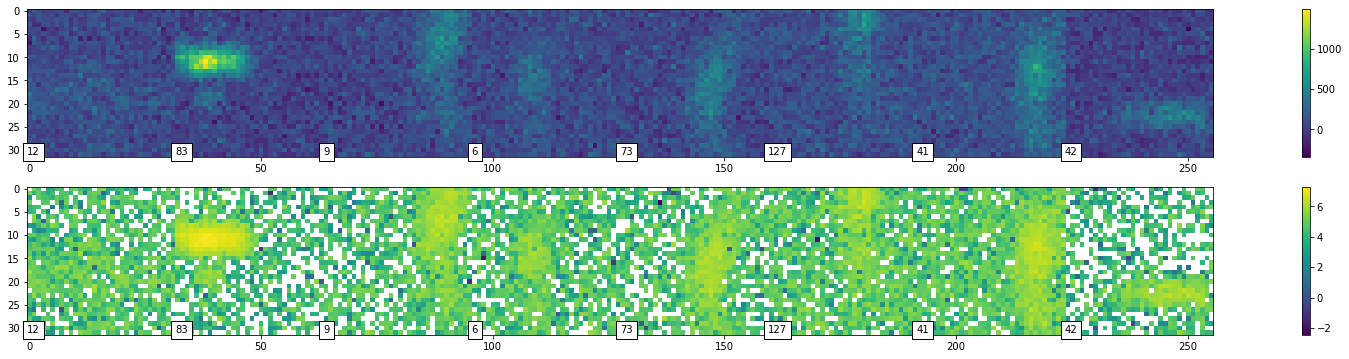

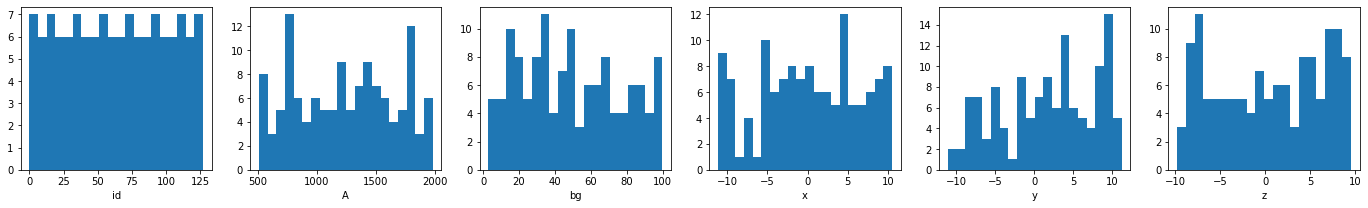

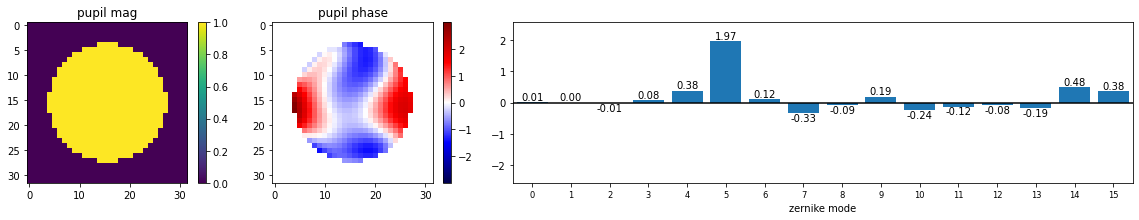

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_params': {'z':[-10,10]},
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    # 'padding': (4,4),
    # 'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

need slicing: False
CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-03-14_18-13-50_DESKTOP-7NNT713\model.ptm


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-13-50_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.scale.weight'])
optimizer_state_dict: dict_keys(['state', 'param_groups'])
loss_function_state_dict: odict_keys([])
log_path: D:\Pytorch\runs\2022-03-14_18-13-50_DESKTOP-7NNT713
epoch: 1
loss: 41110.21875


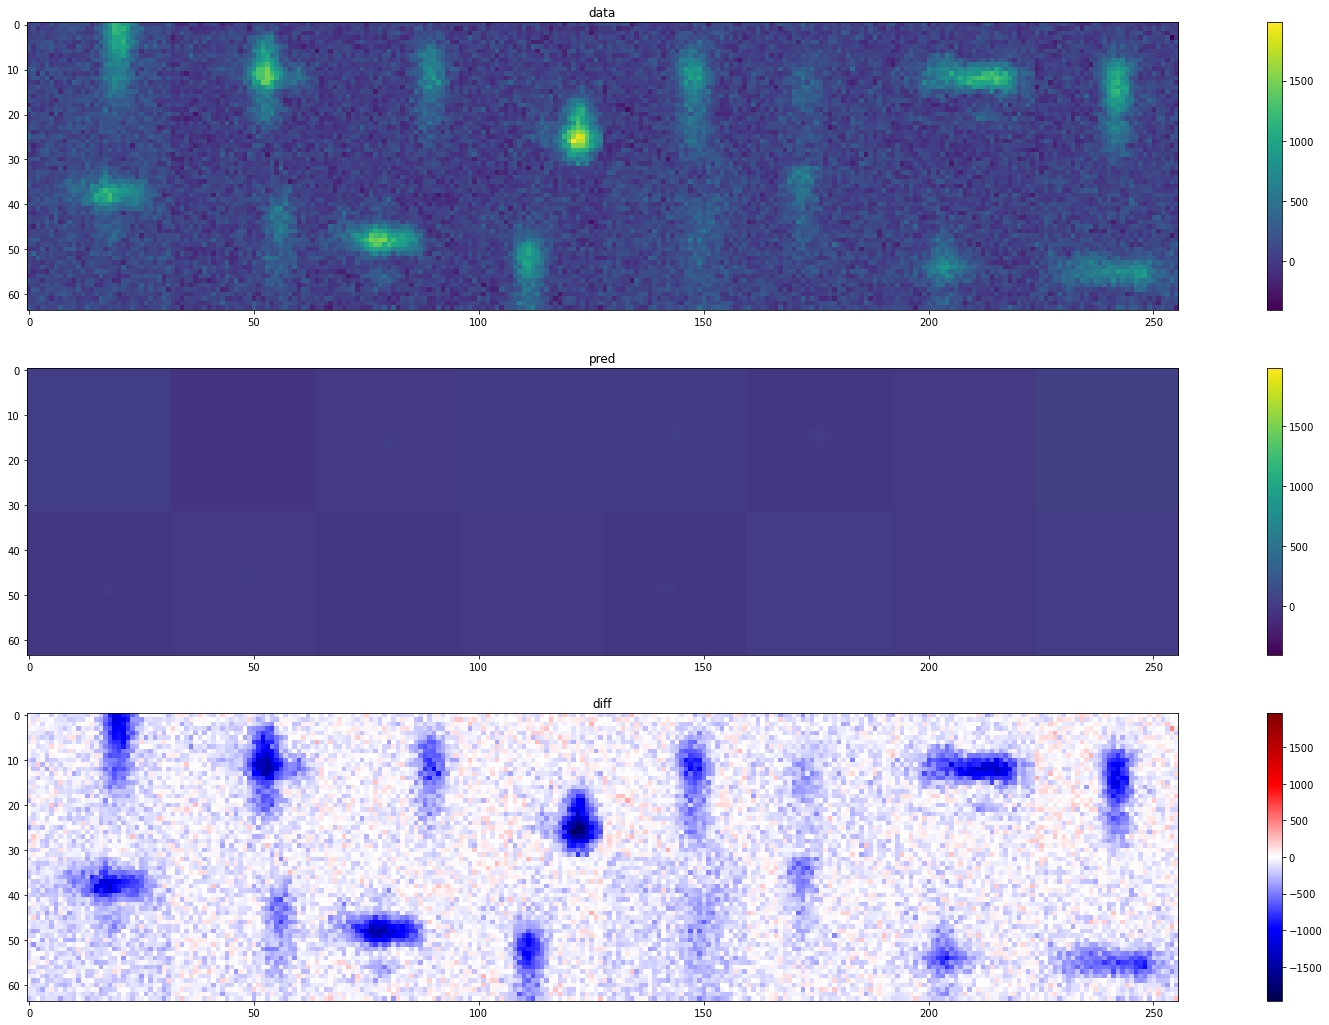

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":len(train_dataloader.dataset)
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
# model.check_model(fitting_model, )

# filepath = training.current_state["log_path"]
# print(filepath)
# training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
# training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
# training.train_data_loader = train_dataloader
# training.valid_data_loader = valid_dataloader
# training.train_and_validate(2, label="test")
# model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-03-14_18-13-51_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-13-51_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight', 'enc

D:\Github\smlm-dl\smlm_dl\model\base.py:145: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img))


D:\Pytorch\runs\2022-03-14_18-13-51_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2022-03-14_18-13-51_DESKTOP-7NNT713\model.ptm, last modified: Mon Mar 14 18:13:51 2022
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─DirectMapperModel: 1-1                 --
│    └─ModuleDict: 2-1                   --
├─Gaussian2DRenderer: 1-2                --
├─ConvImageEncoderModel: 1-3             --
│    └─ModuleDict: 2-2                   --
│    │    └─Sequential: 3-1              2,480
│    │    └─Sequential: 3-2              13,888
│    │    └─Sequential: 3-3              55,424
│    └─ModuleDict: 2-3                   --
│    └─ModuleDict: 2-4                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDi

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-13-54_DESKTOP-7NNT713_test\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_layer_1.0.bias', 'encoder.neck.conv_layer_1.1.weight',

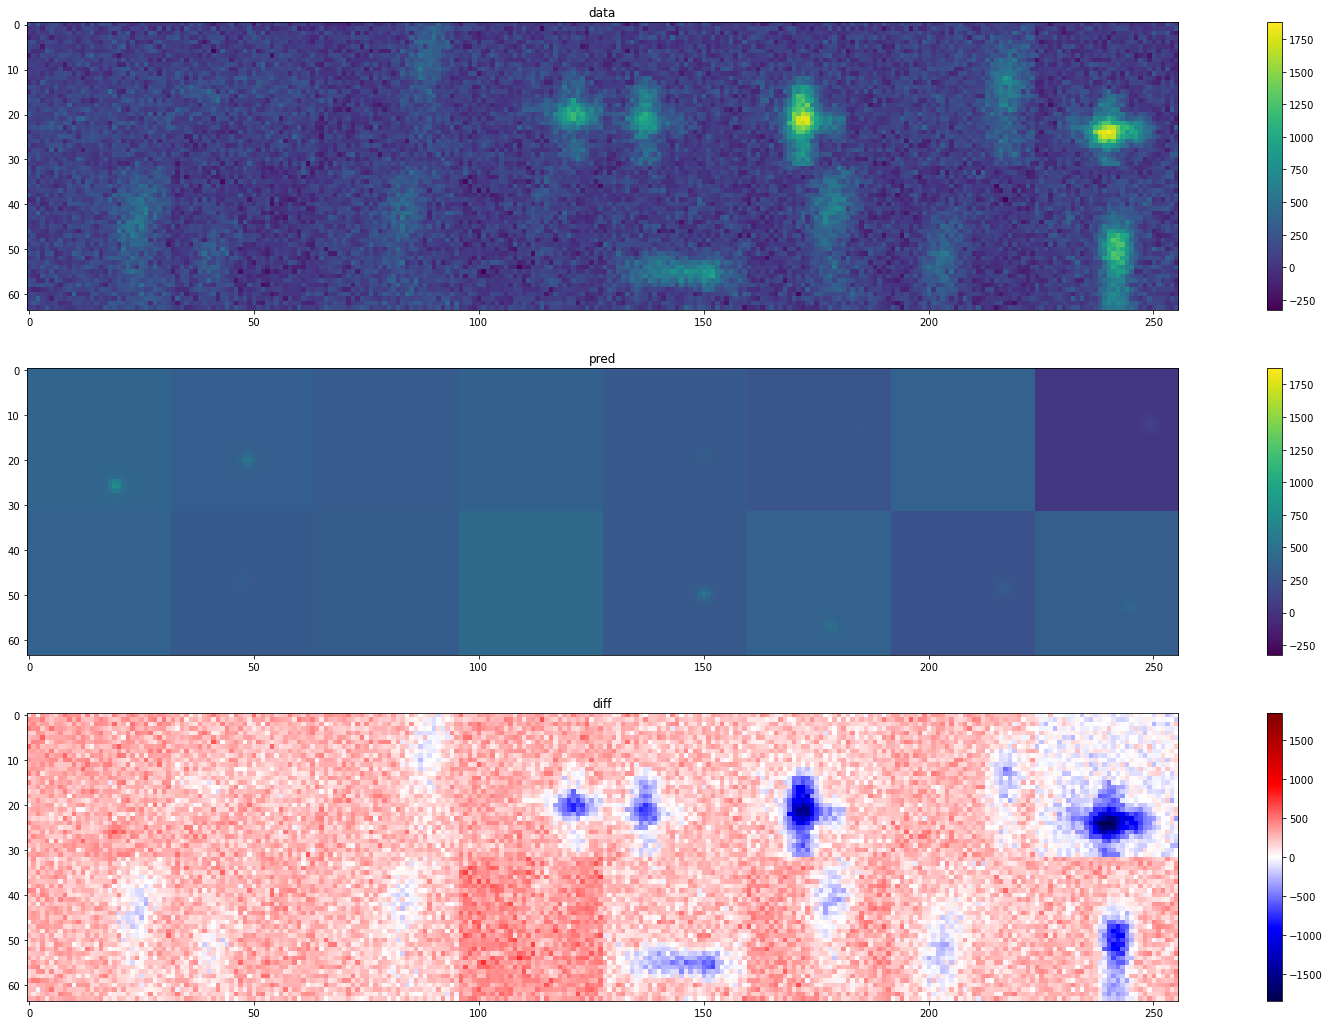

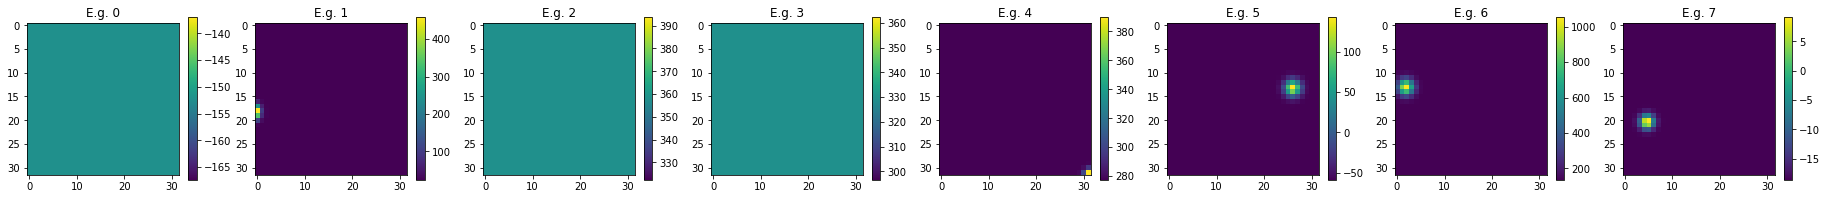

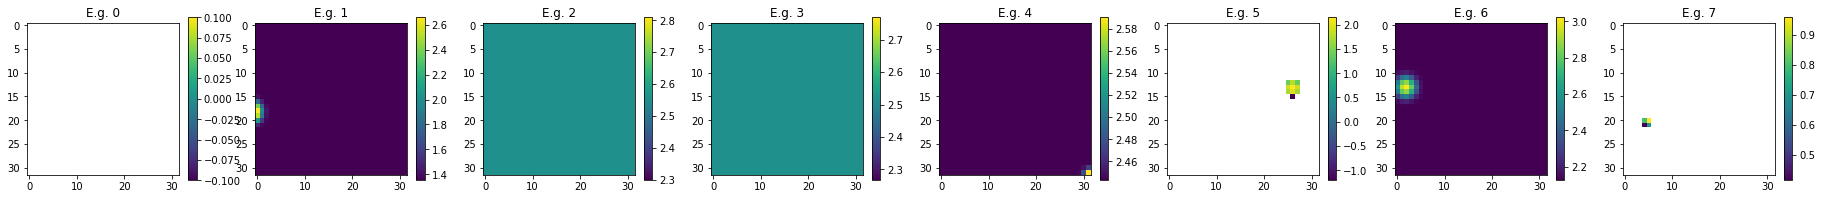

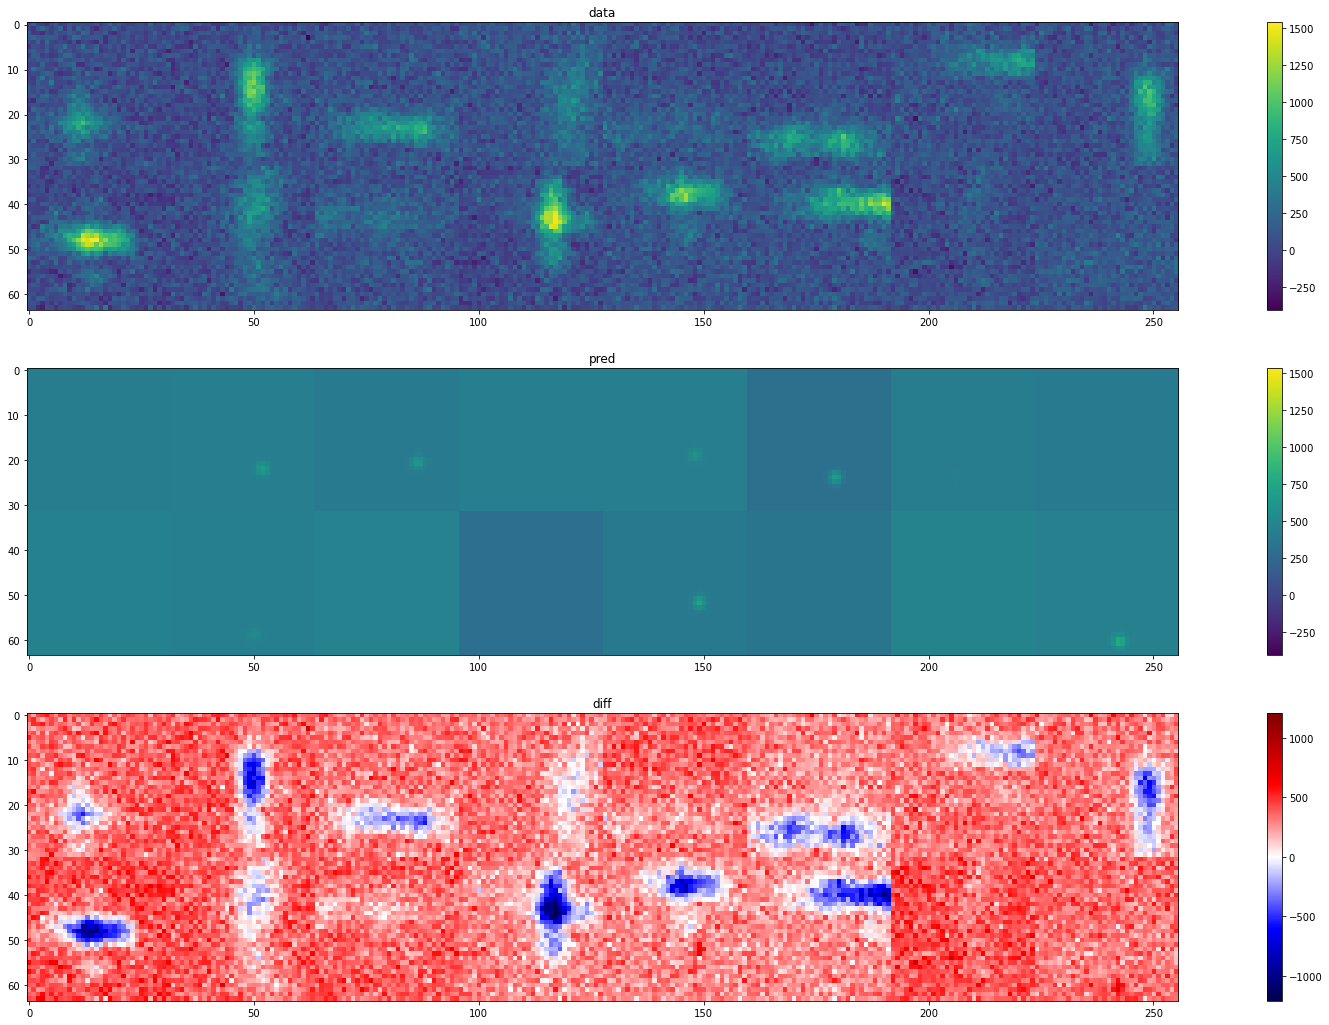

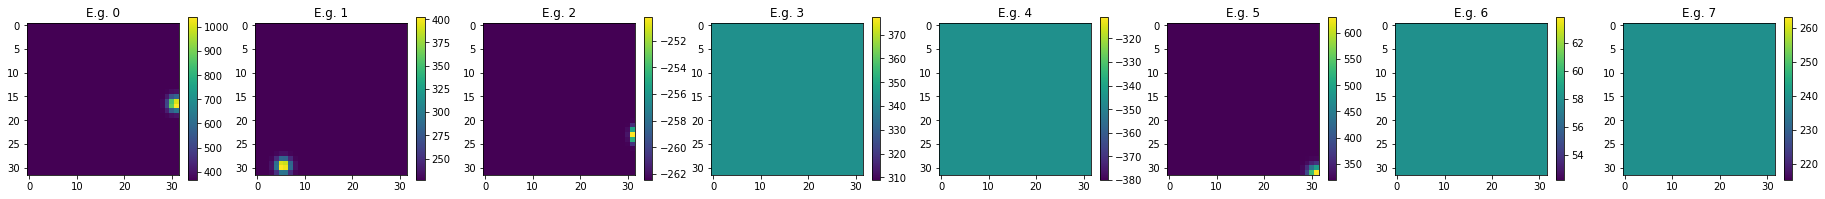

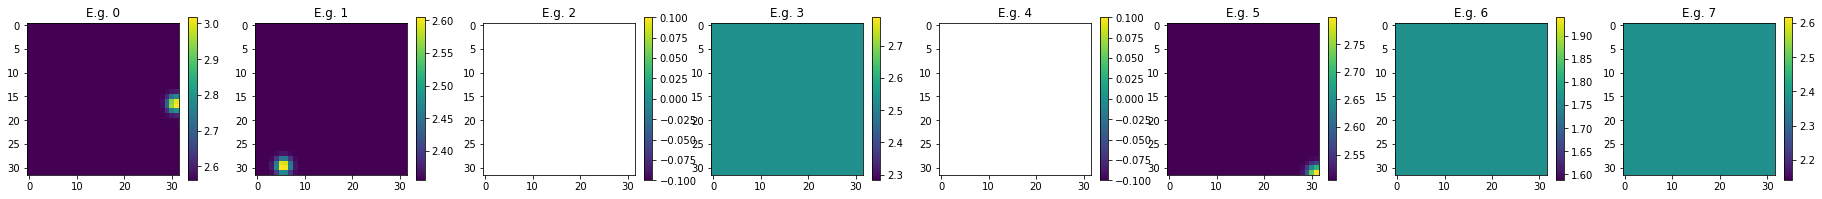

In [4]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-03-14_18-14-03_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Saved to : D:\Pytorch\runs\2022-03-14_18-14-03_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_l

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-14-07_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bias', 'encoder.neck.conv_layer_1.0.weight', 'encoder.neck.conv_l

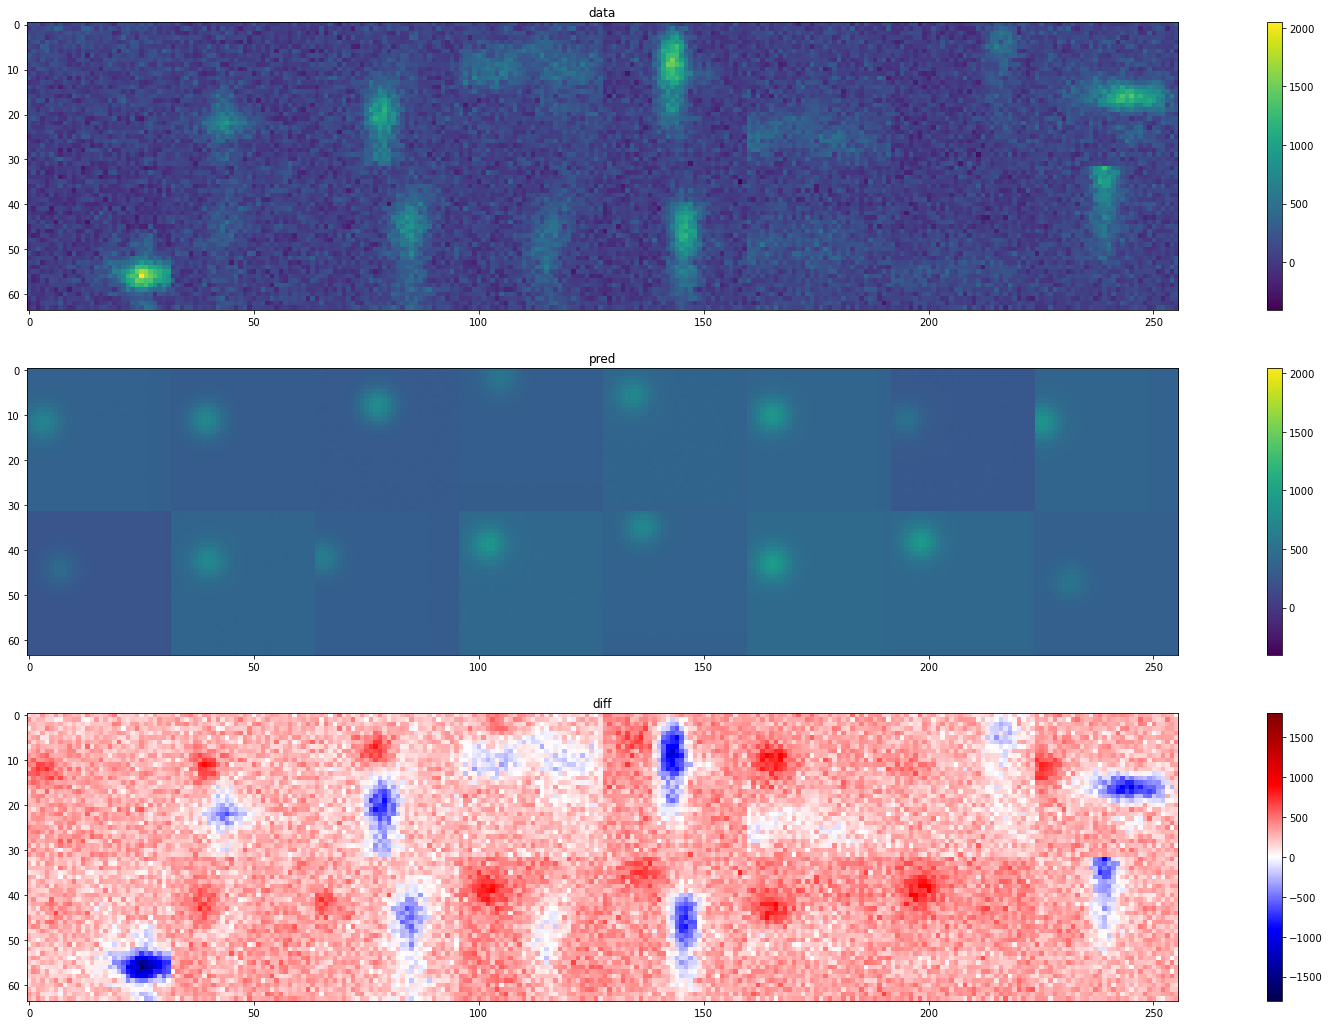

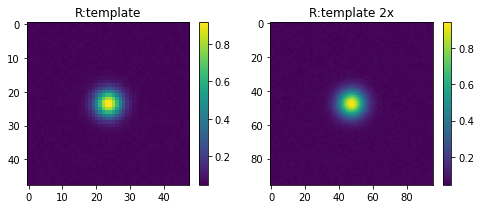

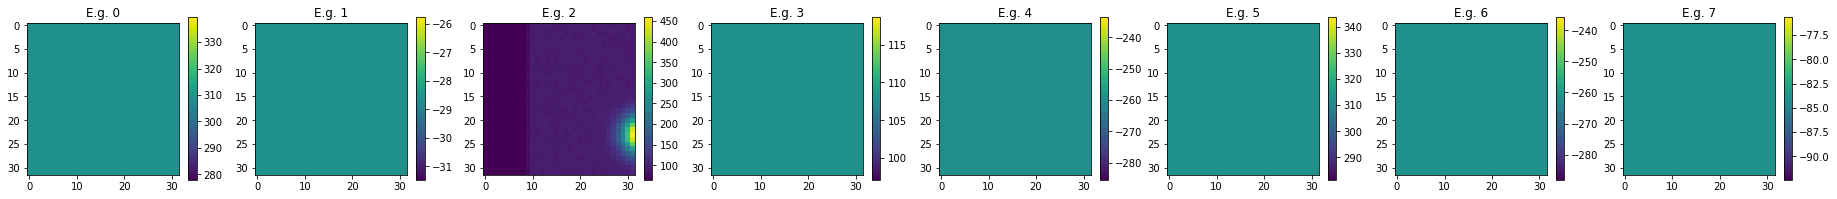

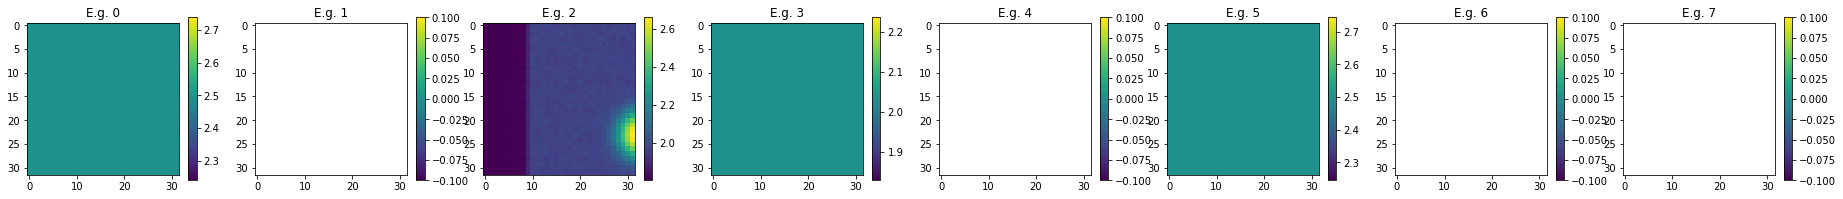

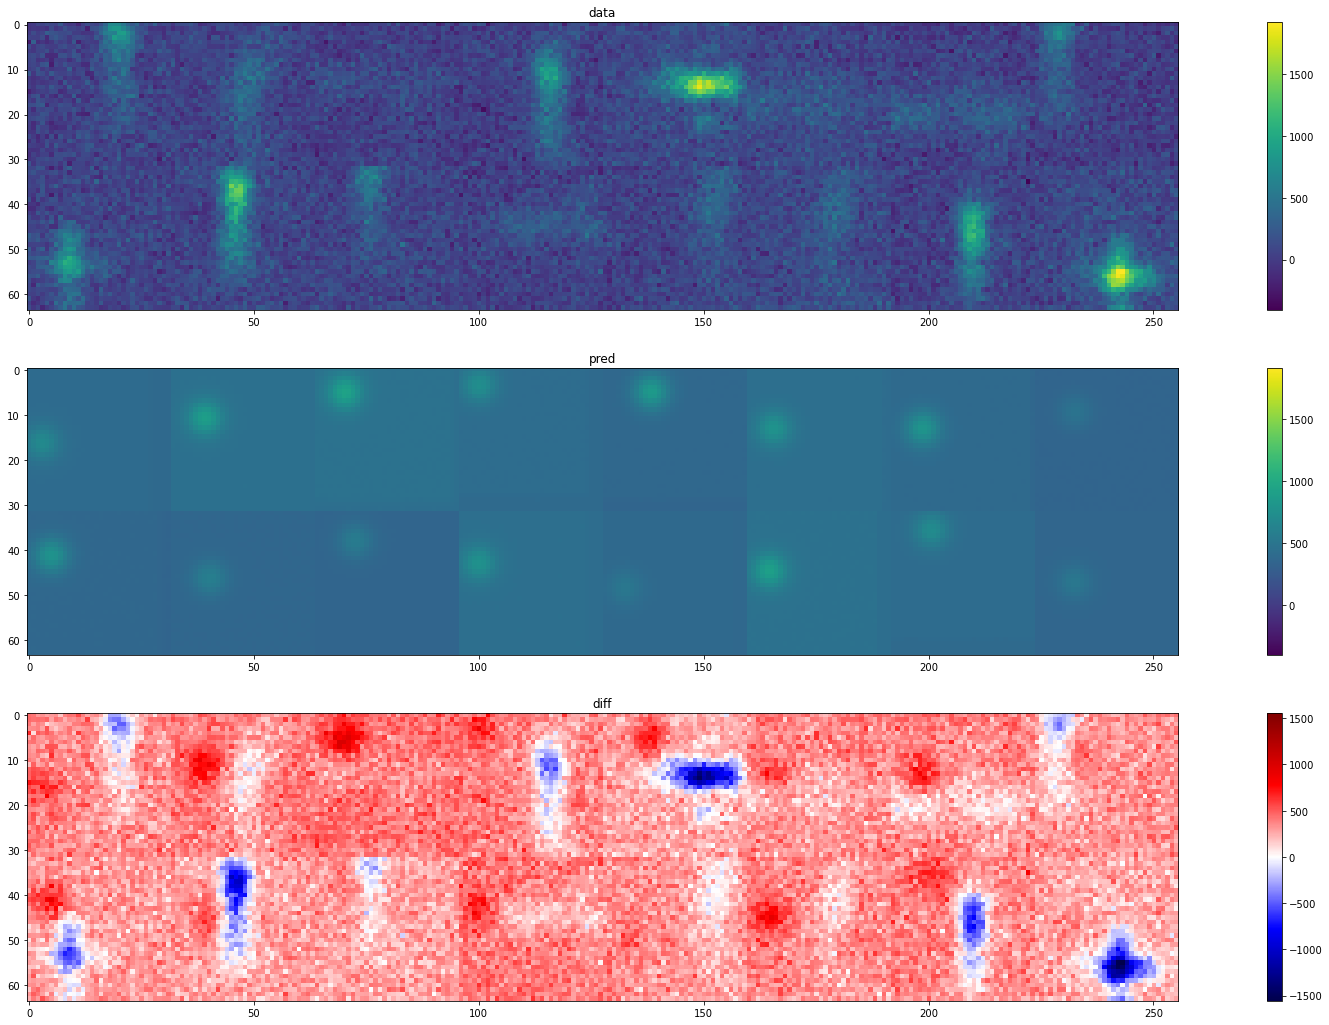

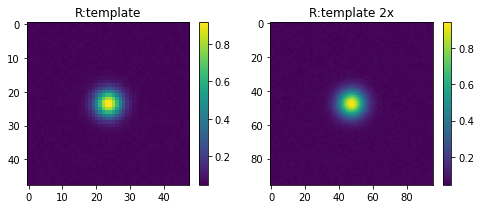

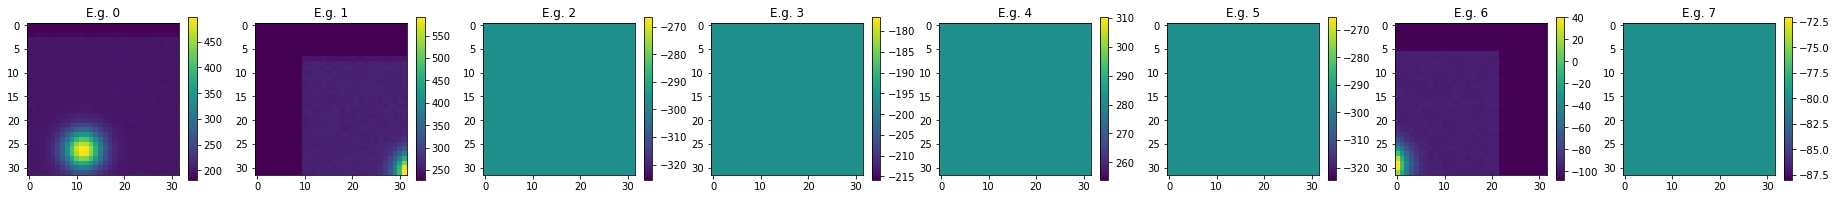

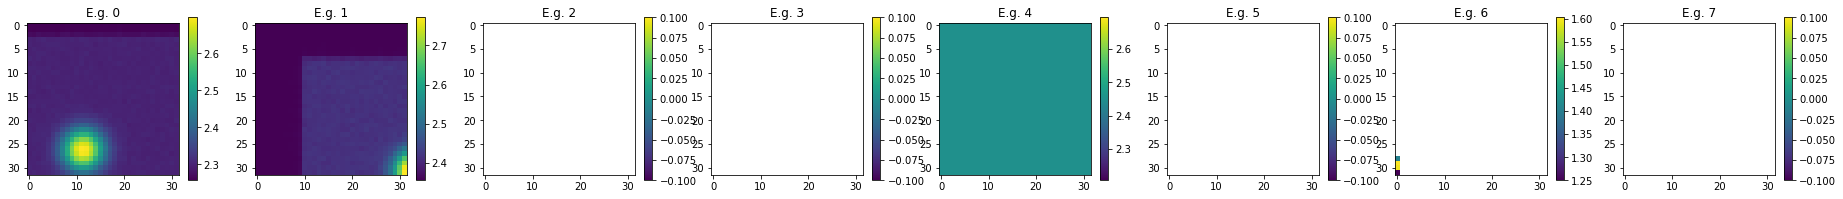

In [5]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-03-14_18-14-18_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-14-18_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bi

D:\Github\smlm-dl\smlm_dl\model\base.py:145: RuntimeWarning: divide by zero encountered in log10
  im = axes[0, i].imshow(np.log10(img))


D:\Pytorch\runs\2022-03-14_18-14-18_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2022-03-14_18-14-18_DESKTOP-7NNT713\model.ptm, last modified: Mon Mar 14 18:14:18 2022
Layer (type:depth-idx)                   Param #
FourierOptics2DModel                     --
├─DirectMapperModel: 1-1                 --
│    └─ModuleDict: 2-1                   --
├─FourierOptics2DRenderer: 1-2           --
│    └─Sequential: 2-2                   --
│    │    └─ParameterModule: 3-1         1,024
├─ConvImageEncoderModel: 1-3             --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-2              2,480
│    │    └─Sequential: 3-3              13,888
│    │    └─Sequential: 3-4              55,424
│    └─ModuleDict: 2-4                   --
│    └─ModuleDict: 2-5                   --
│    │    └─Sequential

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-14-21_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.mask', 'renderer.zern_tilt', 'renderer.zern_tip', 'renderer.zern_defocus', 'renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.conv_layer_0.0.weight', 'encoder.neck.conv_layer_0.0.bias', 'encoder.neck.conv_layer_0.1.weight', 'encoder.neck.conv_layer_0.1.bias', 'encoder.neck.conv_layer_0.3.weight', 'encoder.neck.conv_layer_0.3.bias', 'encoder.neck.conv_layer_0.4.weight', 'encoder.neck.conv_layer_0.4.bi

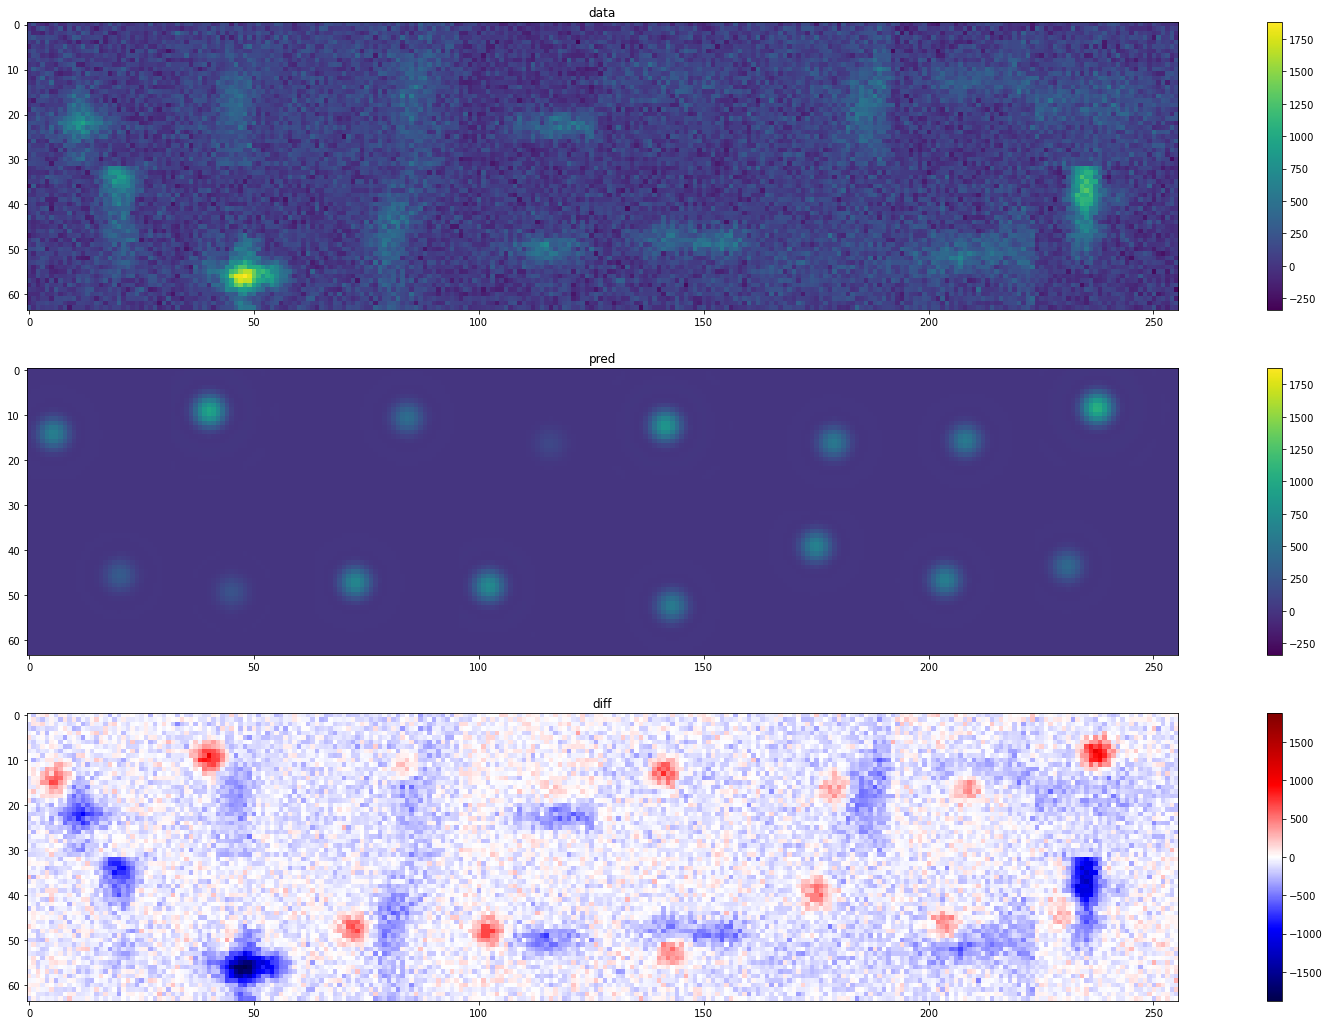

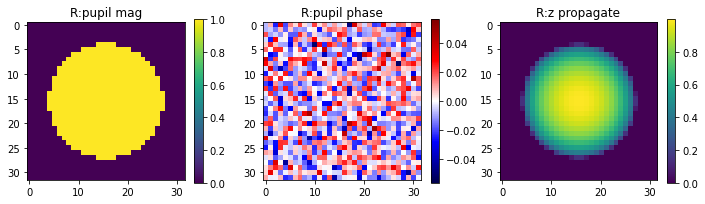

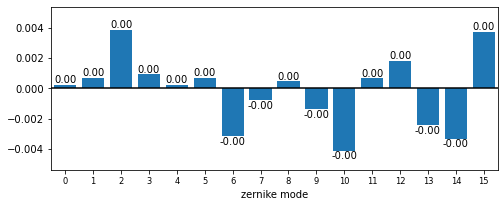

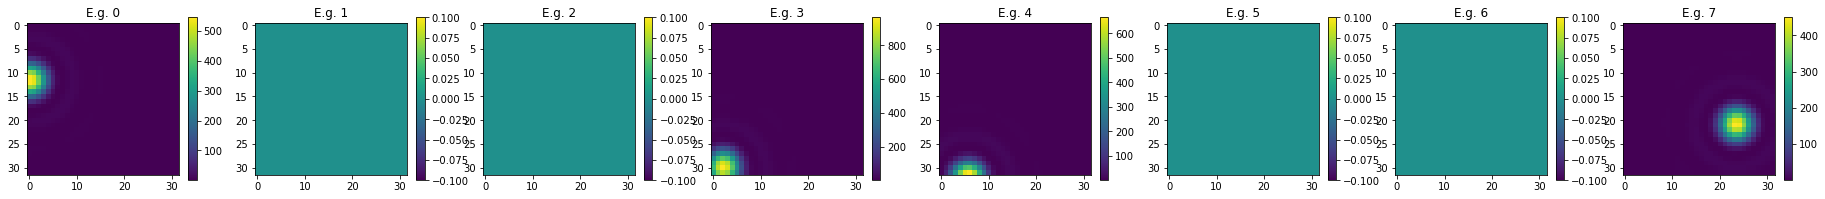

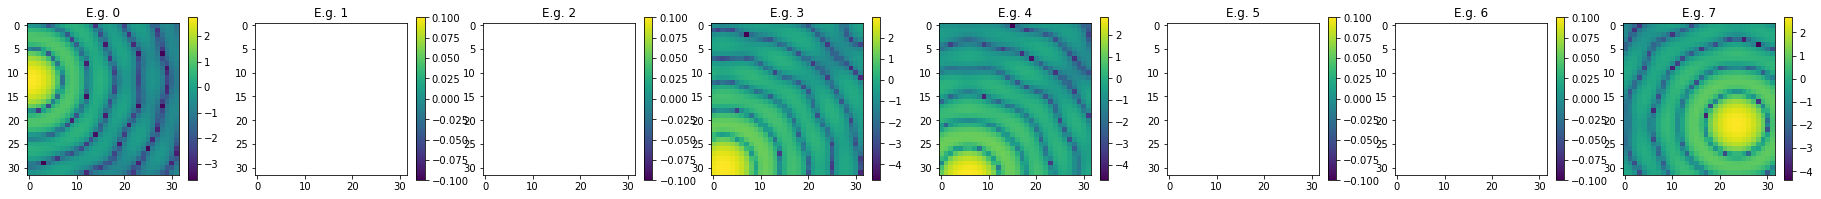

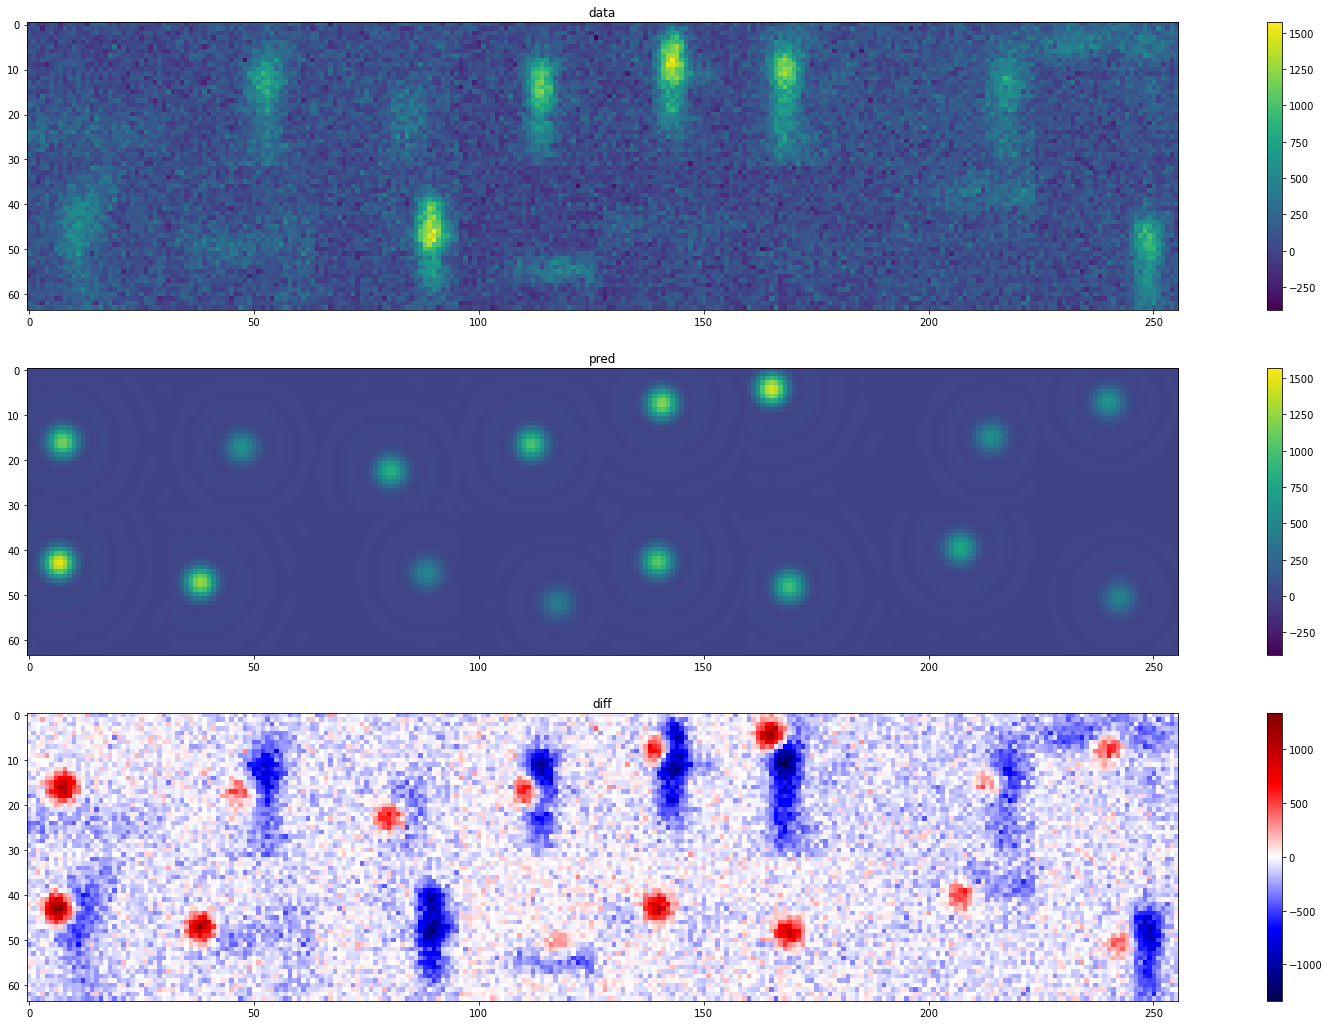

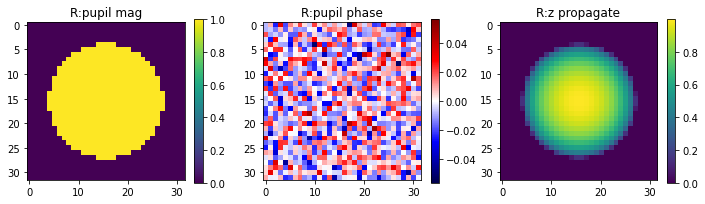

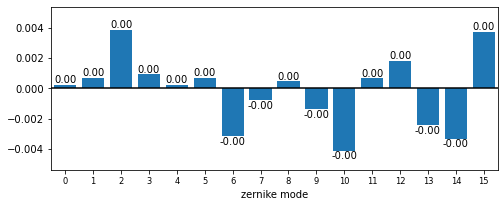

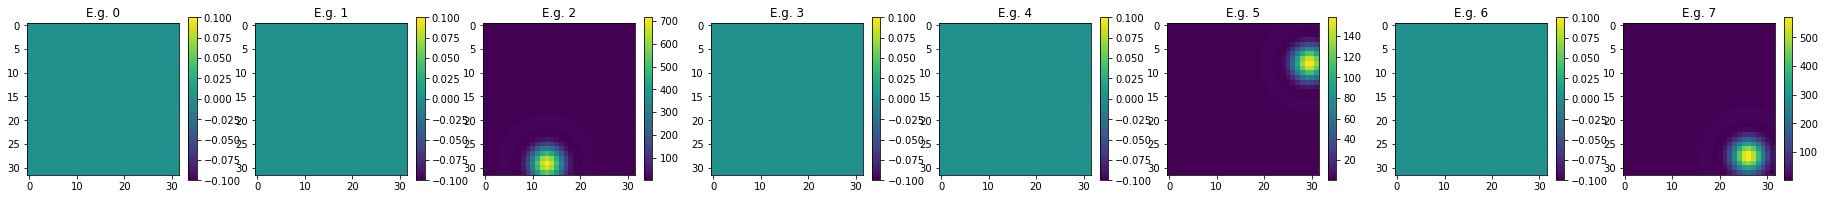

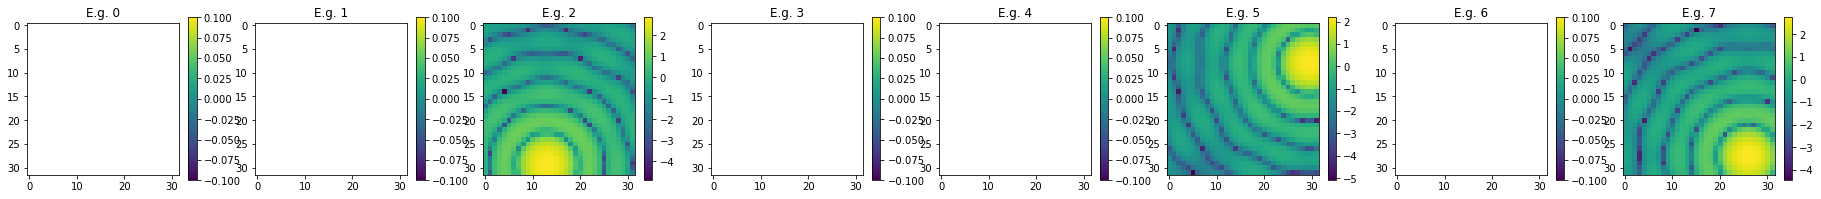

In [6]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2022-03-14_18-14-33_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-14-33_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'encoder.dec

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2022-03-14_18-14-42_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.2.weight', 'encoder.encoders.conv_layer0.2.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.2.weight', 'encoder.encoders.conv_layer1.2.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.2.weight', 'encoder.encoders.conv_layer2.2.bias', 'encoder.neck.0.weight', 'encoder.neck.0.bias', 'encoder.neck.2.weight', 'encoder.neck.2.bias', 'encoder.decoders.up_conv_layer0.0.weight', 'encoder.decoders.up_conv_layer0.0.bias', 'encoder.decoders.conv_layer0.0.weight', 'encoder.decoders.conv_layer0.0.bias', 'encoder.decoders.conv_layer0.2.weight', 'encoder.decoders.conv_layer0.2.bias', 'encoder.dec

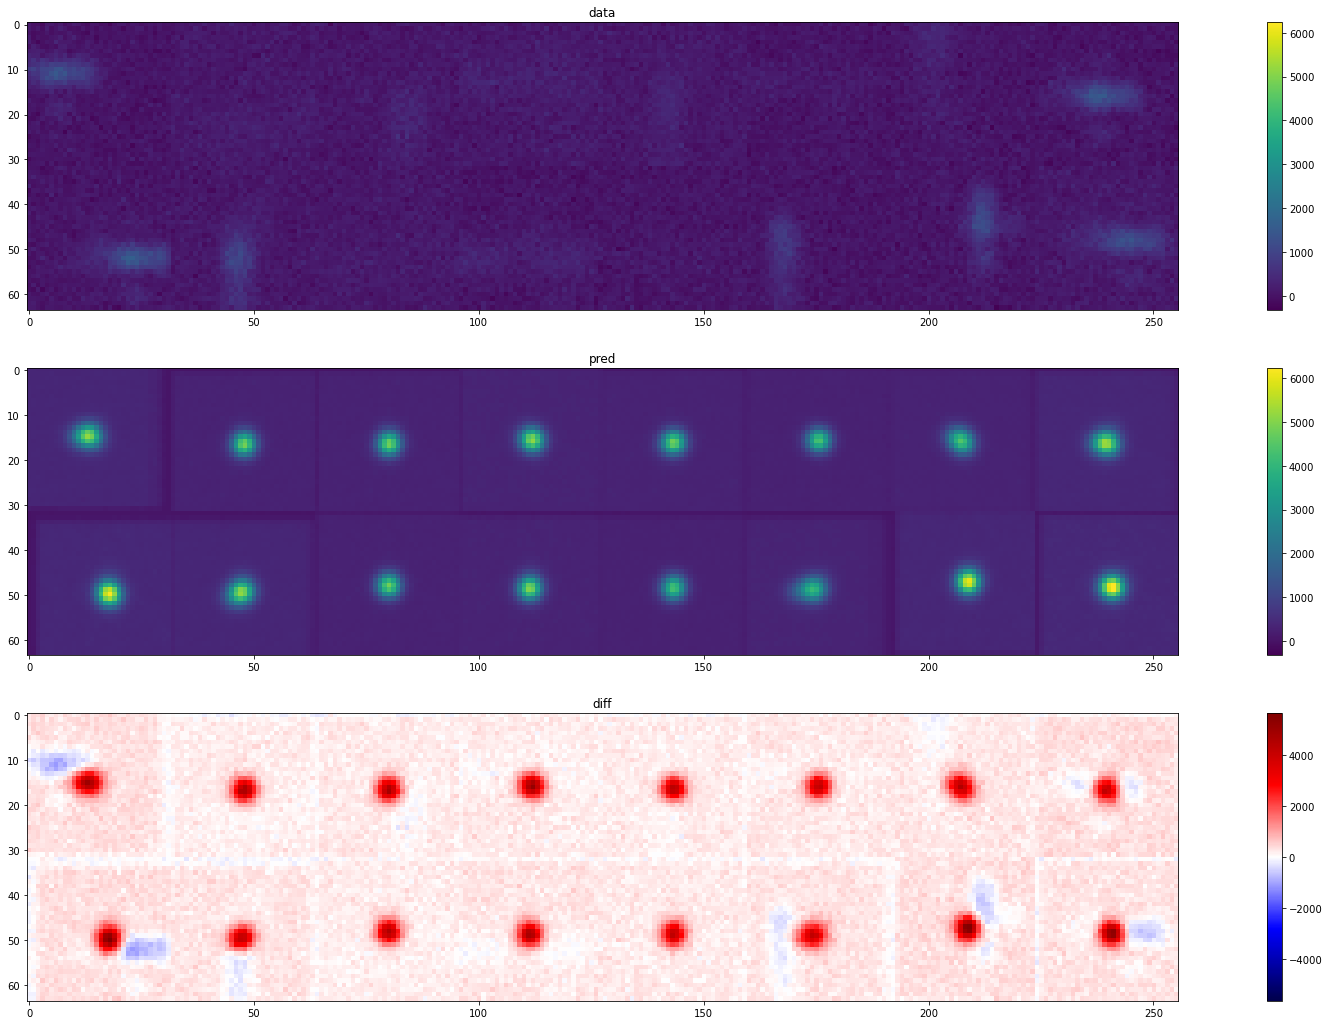

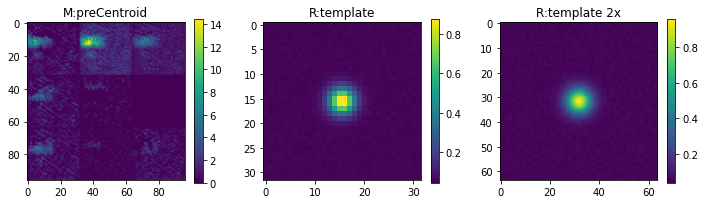

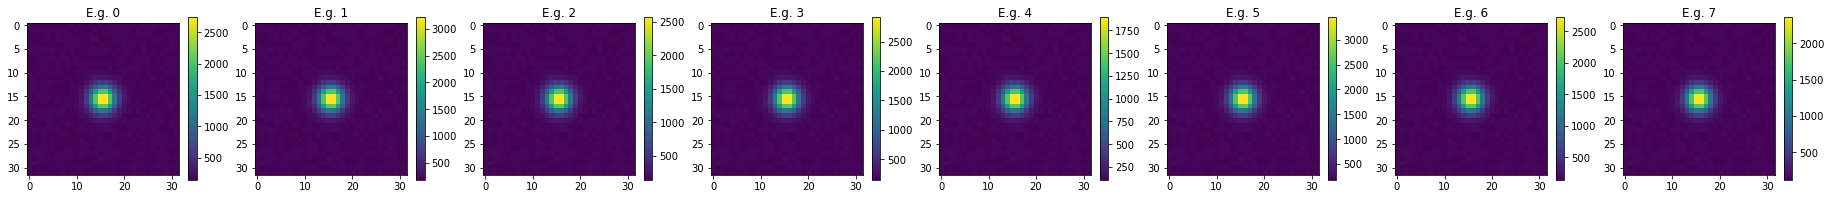

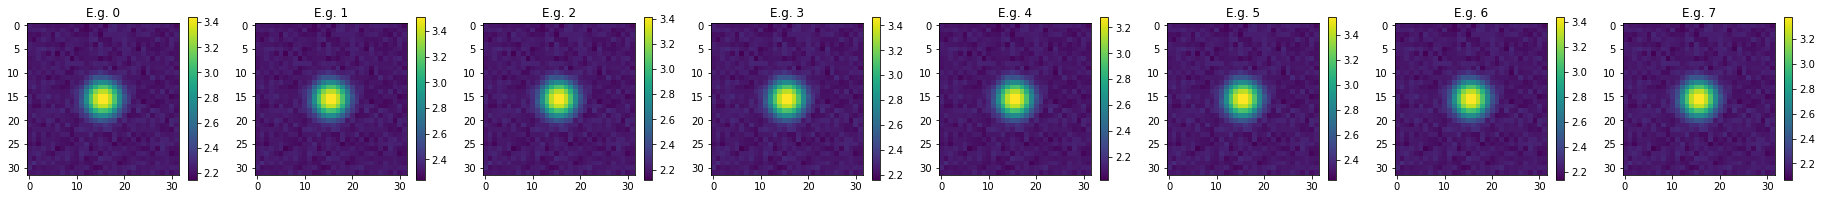

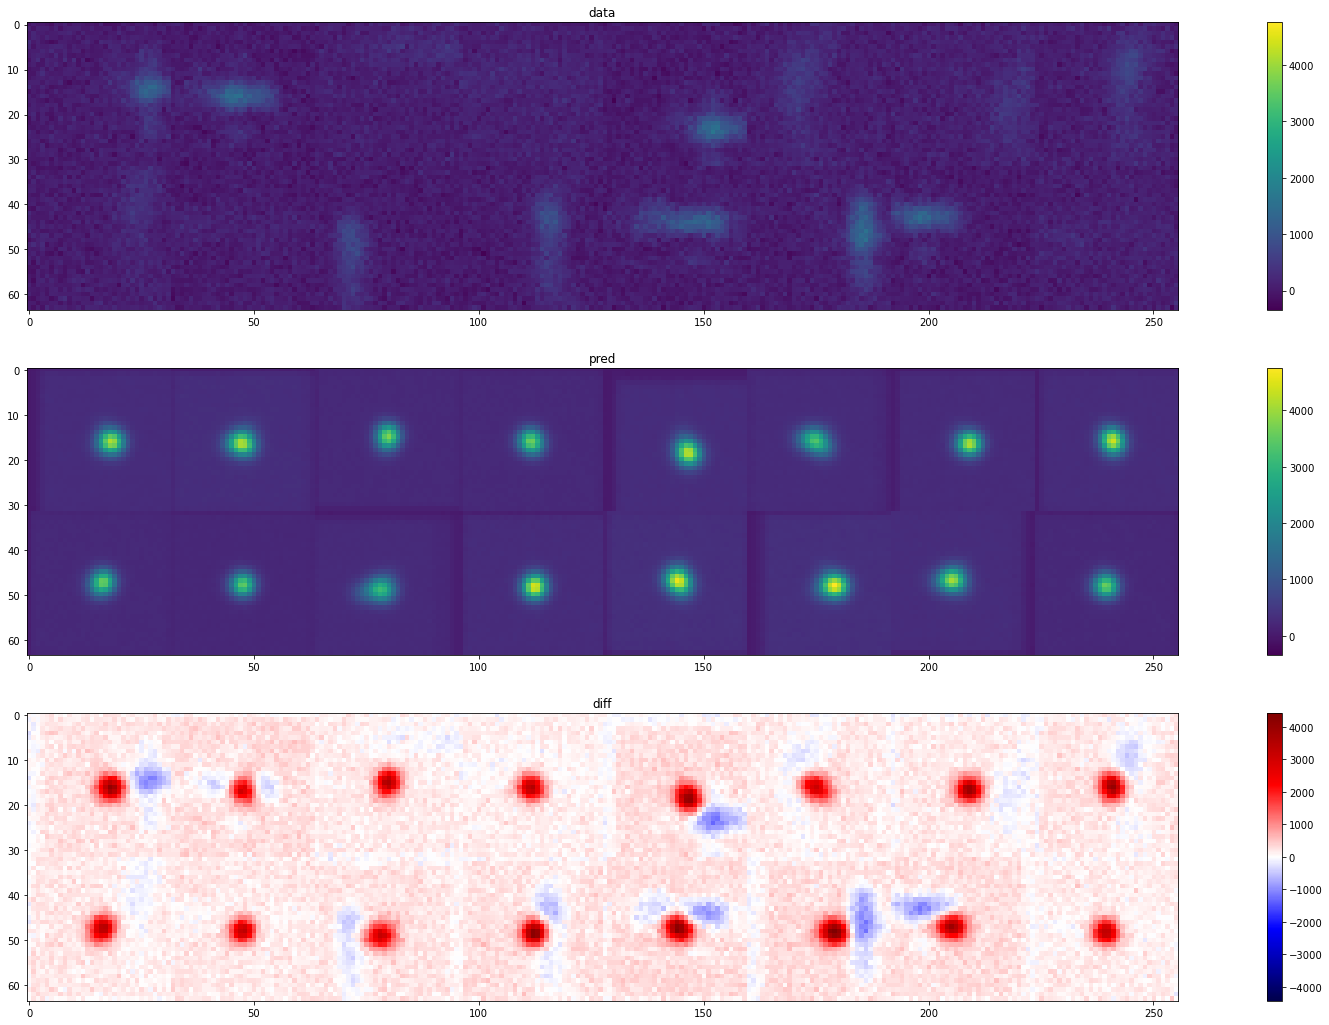

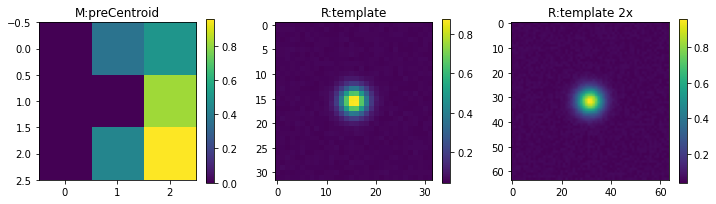

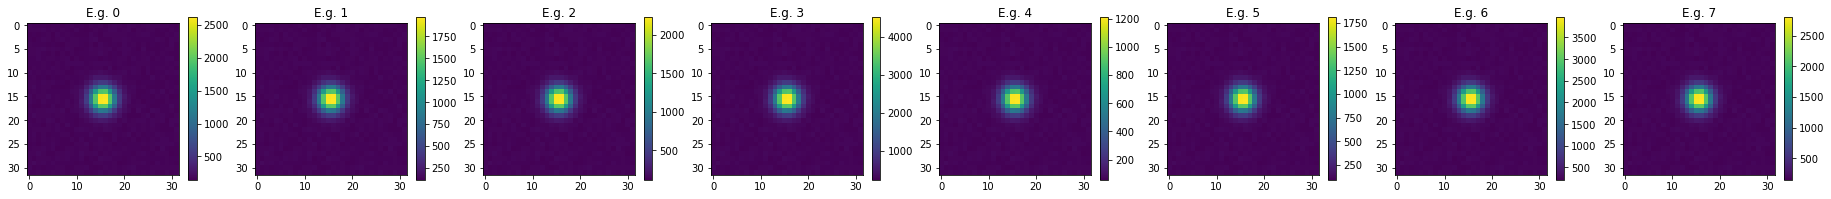

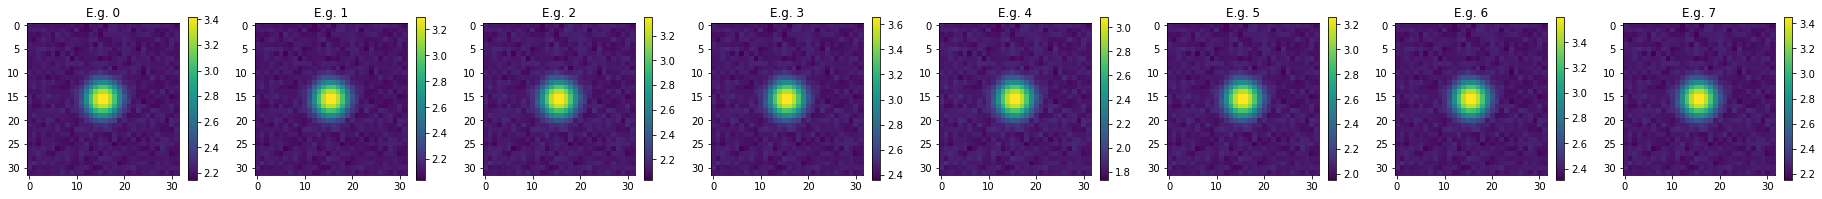

In [7]:
reload(trainer)


fitting_model = model.BaseFitModel(encoder_class=model.UnetEncoderModel,
                                   renderer_class=model.renderer.Template2DRenderer,
                                   mapper_class=model.mapper.CentroidMapperModel,
                                      fit_params=['x','y','A','bg'],
                                      max_psf_count=10,
                                      encoder_params={}
                                     )

training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=True)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )